#Import data

In [ ]:
import pandas as pd
%matplotlib inline
filename = 'MIMIC4_flatfile.csv'

data = pd.read_csv(filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (49,51,53,57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Data Exploration

In [ ]:
data.columns

In [ ]:
prediction_vars = ["subject_id", "admission_type", "discharge_location", "anchor_age", "race", "gender", "has_cerebrovascular_disease",
                   "CAD", "heart_rate_value", "SysBP_value", "DiasBP_value", "MeanBP_value", "respiratory_rate_value", "SpO2_value", "glucose_value",
                   "bicarbonate_value", "urea_value", "chloride_value", "creatinine_value",
                   "hematocrite_value", "platelet_value", "potasium_value", "ptt_value", "wbc_value", "calcium_value", "enteral_nutrition"]
target_variable = ["has_stroke_disease"]
num_lab_tests = ["heart_rate_value", "SysBP_value", "DiasBP_value", "MeanBP_value", "respiratory_rate_value", "SpO2_value", "glucose_value",
                   "bicarbonate_value", "urea_value", "chloride_value", "creatinine_value",
                   "hematocrite_value", "platelet_value", "potasium_value", "ptt_value", "wbc_value", "calcium_value"]
data_new = data[prediction_vars+target_variable]

In [ ]:
x = data[["subject_id", "admission_type", "discharge_location", "anchor_age", "race", "gender", "has_cerebrovascular_disease",
                   "CAD", "heart_rate_value", "SysBP_value", "DiasBP_value", "MeanBP_value", "respiratory_rate_value", "SpO2_value", "glucose_value",
                   "bicarbonate_value", "urea_value", "chloride_value", "creatinine_value",
                   "hematocrite_value", "platelet_value", "potasium_value", "ptt_value", "wbc_value", "calcium_value", "enteral_nutrition"]]

x.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,45297.0,1.499103e+07,2.896575e+06,10000764.0,12468016.0,15007710.0,17536711.0,19999987.0
anchor_age,45297.0,6.643687e+01,1.575568e+01,18.0,56.0,68.0,79.0,91.0
heart_rate_value,11220.0,9.017745e+01,2.206462e+01,0.0,76.0,88.0,103.0,941.0
SysBP_value,11193.0,1.245513e+02,2.521723e+01,0.0,106.0,122.0,140.0,259.0
DiasBP_value,11192.0,7.504521e+01,6.345820e+02,0.0,56.0,66.0,80.0,67168.0
MeanBP_value,11196.0,8.322399e+01,1.960147e+01,-20.0,70.0,81.0,94.0,324.0
respiratory_rate_value,11214.0,2.013349e+01,7.394619e+00,0.0,16.0,19.0,23.0,451.0
SpO2_value,11100.0,8.639703e+01,1.566922e+01,5.0,85.0,85.0,88.0,985.0
glucose_value,11073.0,3.466319e+02,1.343734e+04,0.0,106.0,134.0,187.0,999999.0
bicarbonate_value,44953.0,2.356599e+01,4.787327e+00,2.0,21.0,24.0,26.0,49.0


In [ ]:
x.describe(include = "O")

,admission_type,discharge_location,race,gender
count,45297,45297,45297,45297
unique,8,12,33,2
top,EW EMER.,HOME,WHITE,M
freq,25942,14656,29235,25694


In [ ]:
data.shape

(45297, 88)

In [ ]:
!pip install sweetviz
!pip install pandas-profiling[notebook,html]

In [ ]:
import sweetviz as sv
from pandas_profiling import ProfileReport

my_total_report = sv.analyze(data_new, target_feat ='has_stroke_disease', pairwise_analysis = "on")
my_total_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#Data preparation

In [ ]:
# Change the outliers to nan values
data_processed = data_new.copy()

q = data_new[num_lab_tests].quantile(0.99)
import numpy as np

for lab_test in num_lab_tests:
  q_lab_test = q[lab_test]
  is_above_q = data_processed[lab_test]>q_lab_test
  data_processed[lab_test].loc[is_above_q]=np.nan

data_processed.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,subject_id,anchor_age,heart_rate_value,SysBP_value,DiasBP_value,MeanBP_value,respiratory_rate_value,SpO2_value,glucose_value,bicarbonate_value,urea_value,chloride_value,creatinine_value,hematocrite_value,platelet_value,potasium_value,ptt_value,wbc_value,calcium_value,enteral_nutrition
count,4.529700e+04,45297.000000,11110.000000,11086.000000,11083.000000,11084.000000,11112.000000,11015.000000,10962.000000,44564.000000,44564.000000,44558.000000,44586.000000,44198.000000,44147.000000,44579.000000,31875.000000,44184.000000,42930.000000,19377.000000
mean,1.499103e+07,66.436872,89.476508,123.760689,68.301362,82.504947,19.863481,86.044666,159.637931,23.429943,35.592406,102.376902,1.759626,32.221110,215.981589,4.287869,37.447504,9.352154,8.653527,0.082469
std,2.896575e+06,15.755679,19.637133,23.976251,17.681351,18.161755,5.630397,2.054064,83.155202,4.574634,21.463470,6.097752,1.015936,6.077103,100.160443,0.688704,21.499085,4.936195,0.757192,0.275085
min,1.000076e+07,18.000000,0.000000,0.000000,0.000000,-20.000000,0.000000,5.000000,0.000000,2.000000,2.000000,59.000000,0.000000,9.400000,5.000000,1.500000,14.200000,0.100000,0.000000,0.000000
25%,1.246802e+07,56.000000,76.000000,106.000000,56.000000,70.000000,16.000000,85.000000,106.000000,21.000000,20.000000,99.000000,1.100000,27.800000,149.000000,3.800000,27.700000,6.000000,8.200000,0.000000
50%,1.500771e+07,68.000000,88.000000,122.000000,66.000000,81.000000,19.000000,85.000000,133.000000,24.000000,30.000000,103.000000,1.500000,32.100000,204.000000,4.200000,31.300000,8.300000,8.700000,0.000000
75%,1.753671e+07,79.000000,102.000000,140.000000,79.000000,94.000000,23.000000,88.000000,184.000000,26.000000,45.000000,106.000000,2.000000,36.500000,269.000000,4.700000,37.600000,11.500000,9.100000,0.000000
max,1.999999e+07,91.000000,145.000000,192.000000,125.000000,136.000000,39.000000,90.000000,527.000000,36.000000,125.000000,118.000000,7.700000,48.200000,597.000000,6.700000,150.000000,32.700000,10.900000,1.000000


In [ ]:
# Drop all duplicates
data_processed = data_processed.drop_duplicates(subset = ['subject_id'])
data_processed.describe()

,subject_id,anchor_age,heart_rate_value,SysBP_value,DiasBP_value,MeanBP_value,respiratory_rate_value,SpO2_value,glucose_value,bicarbonate_value,urea_value,chloride_value,creatinine_value,hematocrite_value,platelet_value,potasium_value,ptt_value,wbc_value,calcium_value,enteral_nutrition
count,2.638100e+04,26381.000000,5799.000000,5789.000000,5778.000000,5780.000000,5797.000000,5757.000000,5742.000000,25948.000000,25966.000000,25888.000000,25939.000000,25654.000000,25665.000000,25926.00000,18136.000000,25676.000000,24816.000000,9808.000000
mean,1.497881e+07,67.304954,89.822211,123.610641,68.580132,82.747751,19.869415,86.059927,155.983107,23.450940,33.543711,102.520589,1.678284,32.875700,217.558075,4.25955,37.228579,9.529269,8.647276,0.082178
std,2.890278e+06,16.151744,19.577072,23.798416,17.557509,18.036763,5.728504,1.925214,79.137267,4.459884,20.570620,5.969039,0.981912,6.055231,98.562298,0.67736,21.771729,4.939531,0.762765,0.274649
min,1.000076e+07,18.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,8.000000,0.000000,3.000000,2.000000,60.000000,0.100000,9.400000,5.000000,1.50000,14.200000,0.100000,0.000000,0.000000
25%,1.245592e+07,57.000000,76.000000,106.000000,56.000000,70.000000,16.000000,85.000000,106.000000,21.000000,19.000000,99.000000,1.100000,28.500000,151.000000,3.80000,27.400000,6.200000,8.200000,0.000000
50%,1.501437e+07,69.000000,88.000000,122.000000,67.000000,81.000000,19.000000,85.000000,131.000000,24.000000,28.000000,103.000000,1.400000,32.900000,206.000000,4.20000,30.900000,8.500000,8.700000,0.000000
75%,1.750391e+07,80.000000,103.000000,139.000000,79.000000,94.000000,23.000000,88.000000,178.000000,26.000000,42.000000,106.000000,1.900000,37.100000,270.000000,4.60000,37.100000,11.700000,9.100000,0.000000
max,1.999999e+07,91.000000,145.000000,192.000000,125.000000,136.000000,39.000000,90.000000,503.000000,36.000000,125.000000,118.000000,7.700000,48.200000,597.000000,6.70000,150.000000,32.700000,10.900000,1.000000


In [ ]:
# Delete the missing values:
#for variable in data_processed:
#  print(variable)
#  print(data_processed[variable].unique())

#race - "UNKNOWN"
data_processed["race"] = data_processed['race'].replace('UNKNOWN', np.nan)

has_nan = ["race", "enteral_nutrition", "calcium_value", "wbc_value", "ptt_value", "potasium_value", "platelet_value", "hematocrite_value", "creatinine_value", "chloride_value", "urea_value", "bicarbonate_value", "glucose_value", "SpO2_value", "respiratory_rate_value", "MeanBP_value", "DiasBP_value", "SysBP_value", "heart_rate_value"]
data_processed = data_processed.dropna(subset = has_nan)
data_processed.isna().sum()

subject_id                     0
admission_type                 0
discharge_location             0
anchor_age                     0
race                           0
gender                         0
has_cerebrovascular_disease    0
CAD                            0
heart_rate_value               0
SysBP_value                    0
DiasBP_value                   0
MeanBP_value                   0
respiratory_rate_value         0
SpO2_value                     0
glucose_value                  0
bicarbonate_value              0
urea_value                     0
chloride_value                 0
creatinine_value               0
hematocrite_value              0
platelet_value                 0
potasium_value                 0
ptt_value                      0
wbc_value                      0
calcium_value                  0
enteral_nutrition              0
has_stroke_disease             0
dtype: int64

In [ ]:
data_processed.shape

(2355, 27)

In [ ]:
data_processed['has_stroke_disease'].value_counts()

False    2195
True      160
Name: has_stroke_disease, dtype: int64

In [ ]:
# One hot encoding
test_values = ["anchor_age","has_cerebrovascular_disease",
                   "CAD", "heart_rate_value", "SysBP_value", "DiasBP_value", "MeanBP_value", "respiratory_rate_value", "SpO2_value", "glucose_value",
                   "bicarbonate_value", "urea_value", "chloride_value", "creatinine_value", "hematocrite_value",
               "platelet_value", "potasium_value", "ptt_value", "wbc_value", "calcium_value", "enteral_nutrition"]

X = data_processed[test_values]
race=data_processed['race'].str.split('-').apply(lambda l:l[0])
race = race.str.split('/').apply(lambda l:l[0].replace(' ',''))
race = pd.get_dummies(race, prefix='race')

gender = pd.get_dummies(data_processed['gender'], prefix='gender')
discharge_location = pd.get_dummies(data_processed['discharge_location'], prefix='discharge_location')
admission_type = pd.get_dummies(data_processed['admission_type'], prefix='admission_type')

X = pd.concat([X,race, gender, discharge_location, admission_type],axis=1)
X

,anchor_age,has_cerebrovascular_disease,CAD,heart_rate_value,SysBP_value,DiasBP_value,MeanBP_value,respiratory_rate_value,SpO2_value,glucose_value,...,discharge_location_PSYCH FACILITY,discharge_location_REHAB,discharge_location_SKILLED NURSING FACILITY,admission_type_DIRECT EMER.,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT
37464,74,True,False,73.0,52.0,34.0,38.0,18.0,85.0,52.0,...,0,0,1,0,0,0,0,1,0,0
37470,58,True,False,79.0,62.0,49.0,54.0,28.0,88.0,372.0,...,0,0,1,0,0,0,1,0,0,0
37472,89,False,False,122.0,64.0,50.0,53.0,20.0,85.0,155.0,...,0,0,1,0,0,0,1,0,0,0
37475,63,False,False,105.0,68.0,52.0,59.0,30.0,85.0,189.0,...,0,0,0,0,0,0,0,0,0,1
37477,75,False,False,88.0,68.0,41.0,45.0,17.0,88.0,102.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45264,91,False,False,99.0,151.0,79.0,96.0,25.0,88.0,163.0,...,0,0,1,0,0,0,1,0,0,0
45273,91,False,False,95.0,159.0,66.0,114.0,25.0,85.0,135.0,...,0,0,1,0,0,0,1,0,0,0
45281,76,False,False,121.0,167.0,71.0,94.0,18.0,85.0,112.0,...,0,0,1,0,0,0,0,0,0,1
45283,51,False,False,112.0,167.0,118.0,130.0,21.0,85.0,74.0,...,0,0,1,0,0,0,1,0,0,0


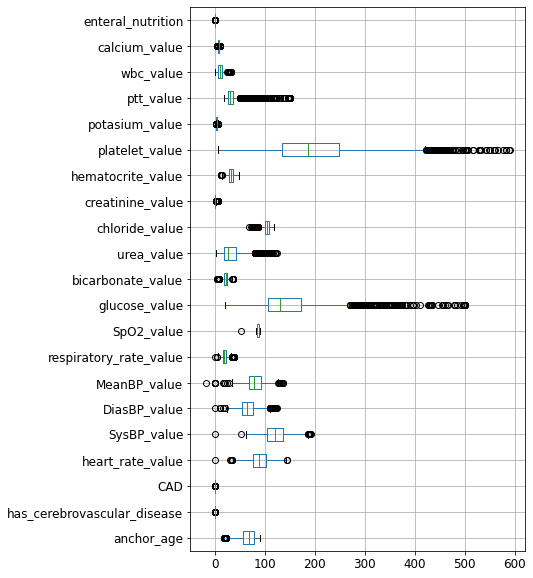

In [ ]:
def vboxplot(X):
  X.boxplot(vert=False, figsize=(6,10), fontsize=12)

vboxplot(X[test_values])

In [ ]:
# Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit(X)
X_norm = min_max_scaler.transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns, index=X.index)
X_norm

,anchor_age,has_cerebrovascular_disease,CAD,heart_rate_value,SysBP_value,DiasBP_value,MeanBP_value,respiratory_rate_value,SpO2_value,glucose_value,...,discharge_location_PSYCH FACILITY,discharge_location_REHAB,discharge_location_SKILLED NURSING FACILITY,admission_type_DIRECT EMER.,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT
37464,0.767123,1.0,0.0,0.503448,0.270833,0.274194,0.363636,0.461538,0.868421,0.066667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37470,0.547945,1.0,0.0,0.544828,0.322917,0.395161,0.467532,0.717949,0.947368,0.733333,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
37472,0.972603,0.0,0.0,0.841379,0.333333,0.403226,0.461039,0.512821,0.868421,0.281250,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
37475,0.616438,0.0,0.0,0.724138,0.354167,0.419355,0.500000,0.769231,0.868421,0.352083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37477,0.780822,0.0,0.0,0.606897,0.354167,0.330645,0.409091,0.435897,0.947368,0.170833,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45264,1.000000,0.0,0.0,0.682759,0.786458,0.637097,0.740260,0.641026,0.947368,0.297917,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45273,1.000000,0.0,0.0,0.655172,0.828125,0.532258,0.857143,0.641026,0.868421,0.239583,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45281,0.794521,0.0,0.0,0.834483,0.869792,0.572581,0.727273,0.461538,0.868421,0.191667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45283,0.452055,0.0,0.0,0.772414,0.869792,0.951613,0.961039,0.538462,0.868421,0.112500,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


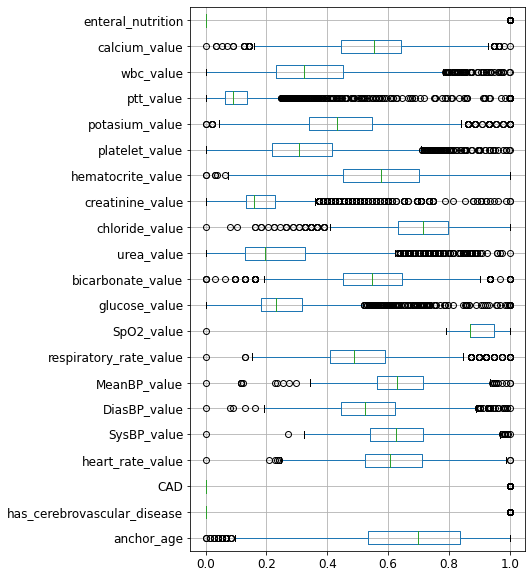

In [ ]:
#הנתונים מפולגים באותם סדרי גודל אחרי הנרמול- להציג במצגת לפני ואחרי
vboxplot(X_norm[test_values])

In [ ]:
X_norm.shape

(2355, 53)

#Model logistic regression

In [ ]:
y = data_processed["has_stroke_disease"]

In [ ]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=0.2, random_state=0)
print('Train size:',X_train.shape)
print('Test size:',X_test.shape)
# Show the balance of the targetS variable
print("Balance between True and False of the Target variable in the train data:")
print(y_train.value_counts(normalize=True))
print("Balance between True and False of the Target variable in the test data:")
print(y_test.value_counts(normalize=True))

Train size: (1884, 53)
Test size: (471, 53)
Balance between True and False of the Target variable in the train data:
False    0.932059
True     0.067941
Name: has_stroke_disease, dtype: float64
Balance between True and False of the Target variable in the test data:
False    0.932059
True     0.067941
Name: has_stroke_disease, dtype: float64


In [ ]:
# Fit a classification model and predict y :
from sklearn.svm import SVC
model = SVC(probability=True) # Set up the model (svc)
model.fit(X_train, y_train) # Fit the model on train data
from sklearn.metrics import accuracy_score
y_predicted1 = model.predict(X_train)
total_accuracy1 = accuracy_score(y_train, y_predicted1)
print('total accuracy on test data: {0:.2%}'.format(total_accuracy1))
y_predicted = model.predict(X_test) # Predict y from X using the trained model

total accuracy on test data: 97.93%


In [ ]:
from sklearn.metrics import accuracy_score
y_predicted1 = model.predict(X_train)
total_accuracy1 = accuracy_score(y_train, y_predicted1)
print('total accuracy on train data: {0:.2%}'.format(total_accuracy1))

total accuracy on train data: 97.93%


In [ ]:
# Evaluate performance:
total_accuracy = accuracy_score(y_test, y_predicted)
print('total accuracy on train data: {0:.2%}'.format(total_accuracy1))
print('total accuracy on test data: {0:.2%}'.format(total_accuracy))

total accuracy on train data: 97.93%
total accuracy on test data: 96.60%


In [ ]:
# Predict classes probability
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_proba

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted, target_names=['no stroke', 'has stroke']))

              precision    recall  f1-score   support

   no stroke       0.99      0.98      0.98       439
  has stroke       0.72      0.81      0.76        32

    accuracy                           0.97       471
   macro avg       0.85      0.89      0.87       471
weighted avg       0.97      0.97      0.97       471



,Predicted=0,Predicted=1
True=0,429,10
True=1,6,26


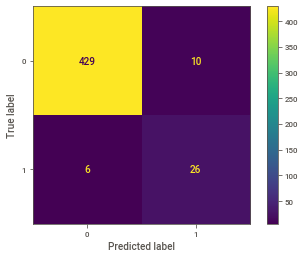

In [ ]:
# Print a confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

# Convert to dataframe for better printing:
cm_df = pd.DataFrame(cm, index=['True=0', 'True=1'], columns=['Predicted=0', 'Predicted=1']) #convert to dataframe
display(cm_df)

# User built-in sklearn confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

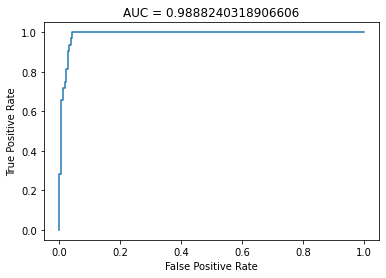

In [ ]:
# ROC curve and AUC score
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate");
f = plt.title(f'AUC = {auc}') # you can write "f" at the beginning of the print instead of using .format()

SVC(probability=True): AUC=0.9888
RandomForestClassifier(n_estimators=2): AUC=0.8711
LogisticRegression(random_state=0): AUC=0.9895



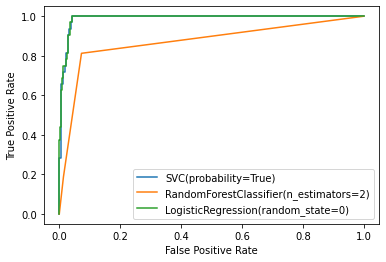

In [ ]:
#random forest model 2
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model2 = RandomForestClassifier(n_estimators=2)
model2.fit(X_train, y_train)
y_pred_proba2 = model2.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)

#logistic regression model3
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression(random_state=0)
model3.fit(X_train, y_train)
y_pred_proba3 = model3.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba3)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)

# Compare AUC between different models
plt.plot(fpr, tpr, label=str(model))
plt.plot(fpr2,tpr2, label=str(model2))
plt.plot(fpr3,tpr3, label=str(model3))
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate");
plt.legend()

print(f'{model}: AUC={round(auc,4)}')
print(f'{model2}: AUC={round(auc2,4)}')
print(f'{model3}: AUC={round(auc3,4)}\n')


In [ ]:
# Compare the accuracy score of the models

print('SVM model- total accuracy on test data: {0:.2%}'.format(total_accuracy))

y_predicted2 = model2.predict(X_train)
total_accuracy2 = accuracy_score(y_train, y_predicted2)
print('Random forest classifier model- total accuracy on train data: {0:.2%}'.format(total_accuracy2))

y_predicted3 = model3.predict(X_train)
total_accuracy3 = accuracy_score(y_train, y_predicted3)
print('Logistic regression model- total accuracy on train data: {0:.2%}'.format(total_accuracy3))

SVM model- total accuracy on test data: 96.60%
Random forest classifier model- total accuracy on train data: 97.40%
Logistic regression model- total accuracy on train data: 97.88%
